In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as tk

ModuleNotFoundError: No module named 'tensorflow'

**1.1**

![A test image](1.1.png)

**1.2**

$h_1 = max(x_1*w_{11}+x_2*w_{21} + b_1, 0)$

$h_2 = max(x_1*w_{12}+x_2*w_{22} + b_2, 0)$

$h_3 = max(x_1*w_{13}+x_2*w_{23} + b_3, 0)$

$h_4 = max(x_1*w_{14}+x_2*w_{24} + b_4, 0)$


$y = \frac{1}{1+e^{-(v1h1+v2h3+v3h3+v4h4+b5)}} $

**1.3**

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-np.array(z)))

def ff_nn_ReLu(X, params):
  (W, b, V, c) = params
  H1 = np.maximum(X @ W + b, 0)
  y_hat = sigmoid(H1 @ V + c)
  return y_hat

**1.4**

In [4]:
W = np.array([[1,-1,0,1],
              [0,0,.5,1]])
b = np.array([0,0,1,0])
V = np.array([[1,0,-1,1]]).T
c = np.array([1])
X = np.array([[1,-1],
              [0,-1],
              [0,1]])

ff_nn_ReLu(X, (W, b, V, c))

array([[0.81757448],
       [0.62245933],
       [0.62245933]])

The probabilities are 0.82, 0.62, 0.62.

2.1

$\frac{\partial f}{\partial x} = -3x^2-100(2y^2-x)=-3x^2+100x-200y^2$

$\frac{\partial f}{\partial y} = 100*4y(2y^2-x) = 800y^3-400xy$

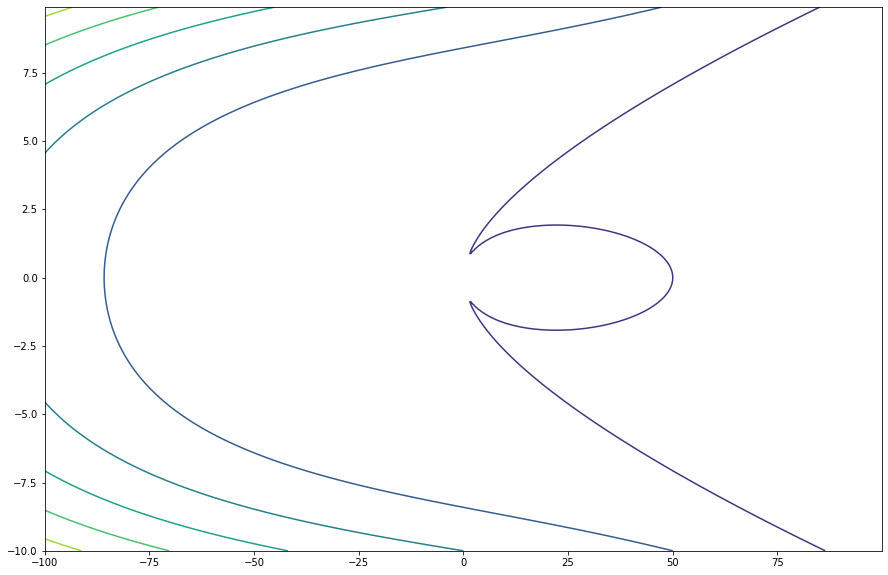

In [29]:
delta = 0.1
x = np.arange(-100.0, 100.0, delta)
y = np.arange(-10.0, 10.0, delta)

X, Y = np.meshgrid(x, y)
Z = 3-X**3 + 50 * (2*Y**2 -x)**2


plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)

In [30]:
def grad_f(vector):
    x, y = vector
    df_dx = -3*x**2+100*x-200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [39]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point is None:
        starting_point = np.random.uniform(-5,5,2)
    
    traj = np.zeros((iterations+1,2))
    traj[0,:] = starting_point
    for i in range(iterations):
        traj[i+1,:] = traj[i,:] - learning_rate*grad_f(traj[i,:])
    return traj

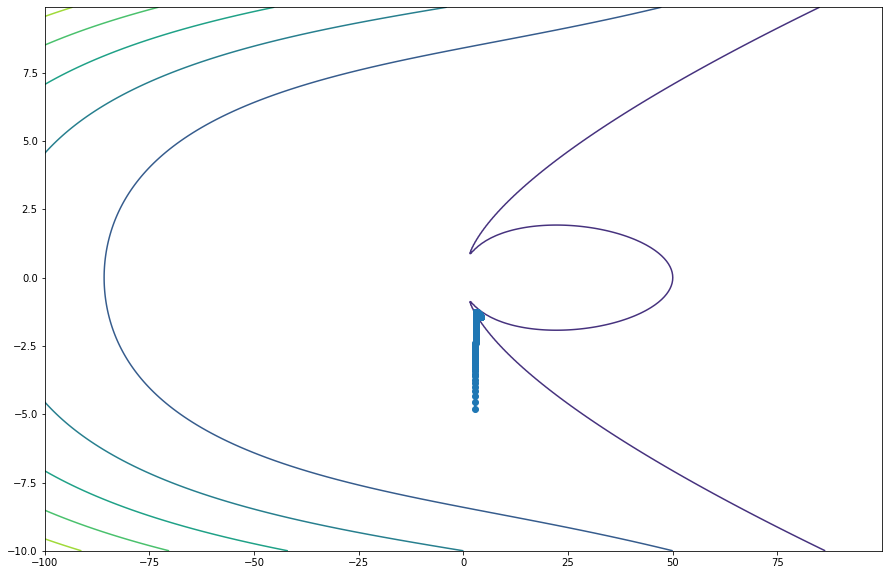

In [53]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=3e-6)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

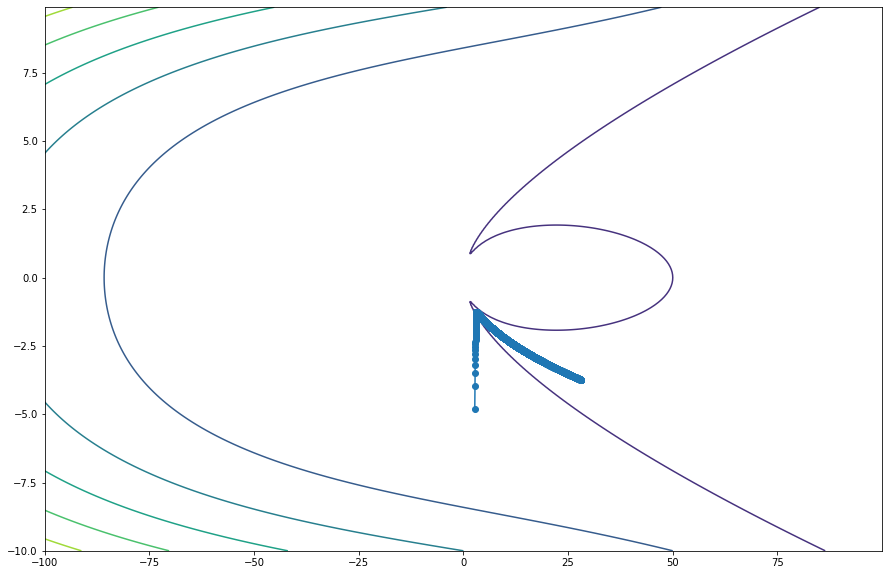

In [54]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=1e-5)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/zhangziyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/zhangziyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/zhangziyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/zhangziyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


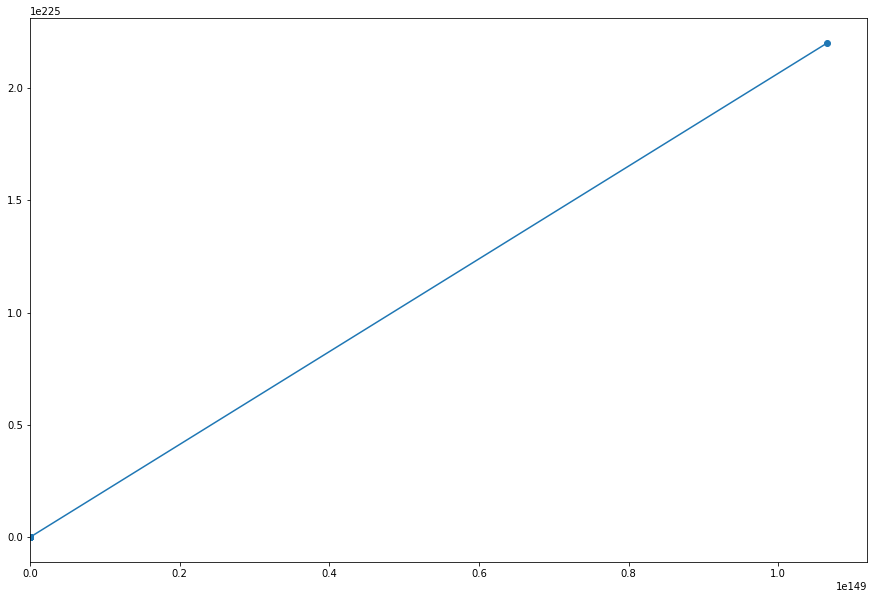

In [55]:
np.random.seed(10)
traj = grad_descent(iterations=10000, learning_rate=2e-5)

plt.figure(figsize=(15,10))
plt.contour(X,Y,Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

## Actually, this funciton has no minimum.